
# **Reto: Música y ciencia de datos**

Santiago Mora Cruz A01369517

Gabriel Reynoso Escamilla A01643561

Adamaris Leticia de Dios Ramos A01643921

Lilian Alessandra Rangel-Barajas A01642892


## **Abstract**


## **Introducción**


## **Objetivo**
Analizar una base de datos musicales usando las técnincas de inferencia estadística aprendidas durante el curso, con el fin de ilustrar datos significativos a través de gráficas efectivas y modernas.

## **Métodos**
Hay datos faltantes en nuestra base de datos.
Para rellenar los espacios faltantes necesitamos calcular la media o la moda según lo necesario. La media representa el punto de equilibrio de la distribución y está influida por los valores extremos. Proporciona una medida de la tendencia general o valor medio de los datos. La moda nos sirve calcularla cuando tenemos muchos valores repetidos.

Queremos identificar las variables numéricas y las variables categóricas.
La variable class es una variable categórica, esta identifica el género de música y a cada género le asignamos un número del 0 al 10 para así poder identificarlos.

Al igual que Class, Key es categórica y esta son las notas musicales, esta es reemplazada con las notas y a cada una le asignamos un número del 1 al 12.

Los histogramas nos sirven para representar las frecuencias de una variable cuantitativa continua, ayudan a ver el centro, la extensión y la forma de un conjunto de datos. En este caso se aplica para la duración de las canciones.

El sns.violinplot() este es una forma de visualizar la distribución de un conjunto de datos, mostrando no sólo la media y la varianza, sino también todo el rango de los datos.

La media aritmética
La media representa el punto de equilibrio de la distribución y está influida por los valores extremos. Proporciona una medida de la tendencia general o valor medio de los datos.

La transformación de Box-Cox es una transformación potencial que corrige la asimetría de una variable, usadas en estadística para corregir sesgos en la distribución de errores, para corregir varianzas desiguales y principalmente para corregir la no linealidad en la relación.

La prueba de Grubbs se usa para encontrar un solo valor atípico en un conjunto de datos normalmente distribuido. La prueba encuentra si un valor mínimo o un valor máximo es un valor atípico.


### Fase 1: Exploración del problema



## **Resultados**
Importamos el archivo "music.csv" como dataframe en python.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import scipy
import numpy as np
import plotly.express as px
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler


In [ ]:
datos = pd.read_csv("music.csv")
datos.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [ ]:
datos.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


Después de revisar si hay datos faltantes, encontramos a las variables key, Popularity e instrumentalness. Calculamos la moda para la variable key y la media para Popularity e instrumentalness.

In [ ]:
datos["key"].mode()

0    7.0
Name: key, dtype: float64

In [ ]:
datos["Popularity"].fillna(datos["Popularity"].mean(), inplace=True)
datos["key"].fillna(7, inplace=True)
datos["instrumentalness"].fillna(datos["instrumentalness"].mean(), inplace=True)

Identificamos las columnas que contengan como dtype object para poder codificarlas.

In [ ]:

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17996 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 17996 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    17996 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

En la variable ClassTexto codificamos los géneros musicales con números del 1 al 10.

|   Género       |  Código  |
|----------------|----------|
| Acoustic/Folk  |    0     |
| Alternative    |    1     |
| Blues          |    2     |
| Bollywood      |    3     |
| Country        |    4     |
| Hip-Hop        |    5     |
| Indie          |    6     |
| Instrumental   |    7     |
| Metal          |    8     |
| Pop            |    9     |
| Rock           |   10     |


In [ ]:
#Codificar Variable class como texto
ClassTexto = datos["Class"].replace({0 : 'Acoustic/Folk', 1 : 'Alternative', 2 : 'Blues', 3 : 'Bollywood', 4 : 'Country', 5 : 'Hip-Hop', 6 : 'Indie', 7 : 'Instrumental', 8 : 'Metal', 9: 'Pop', 10 : 'Rock'})

ClassTexto.head()

0    Hip-Hop
1       Rock
2      Indie
3    Hip-Hop
4       Rock
Name: Class, dtype: object

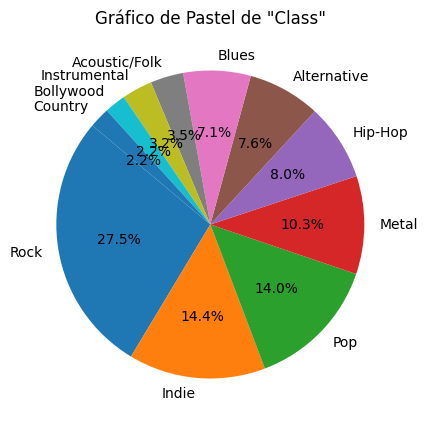

In [ ]:
# Cuenta las ocurrencias de la categoría key
conteo_categorias = ClassTexto.value_counts()

# Crea la 'pie chart'
plt.figure(figsize=(5, 5))
plt.pie(conteo_categorias, labels=conteo_categorias.index, autopct='%1.1f%%', startangle=140)
plt.title('Gráfico de Pastel de "Class"')
plt.show()

El gráfico de pastel de "Class" nos dice la ocurrencia de cada género.

Creamos la variable KeyTexto en la que codificamos las notas musicales con números del 1 al 12.

|   Nota|  Código  |
|----------------|----------|
| A  |    1    |
| A# |    2    |
| B  |    3    |
| C |    4    |
| C#  |    5     |
| D |    6     |
| D#  |    7     |
| E |    8     |
| F  |    9     |
| F# |    10     |
| G  |   11     |
| G# |    12     |



In [ ]:

KeyTexto = datos["key"].replace({1:'A', 2:'A#', 3:'B', 4:'C', 5:'C#', 6:'D', 7:'D#', 8:'E', 9:'F', 10:'F#', 11:'G', 12:'G#'})

0     A
1     B
2     D
3    F#
4    A#
Name: key, dtype: object

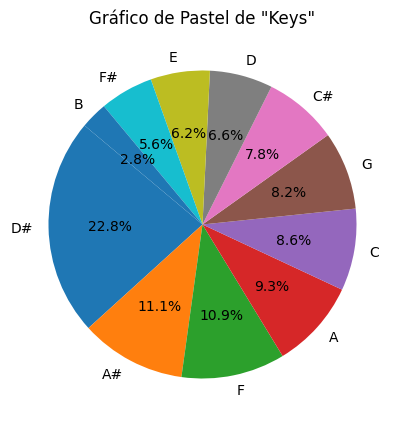

In [ ]:
# Cuenta las ocurrencias de la categoría key
conteo_categorias = KeyTexto.value_counts()

# Crea la 'pie chart'
plt.figure(figsize=(5, 5))
plt.pie(conteo_categorias, labels=conteo_categorias.index, autopct='%1.1f%%', startangle=140)
plt.title('Gráfico de Pastel de "Keys"')
plt.show()

Este Gráfico de pastel de "Keys" nos dice la ocurrencia de cada una de las notas.

Histograma: "Duración de canciones"

<Axes: ylabel='Frequency'>

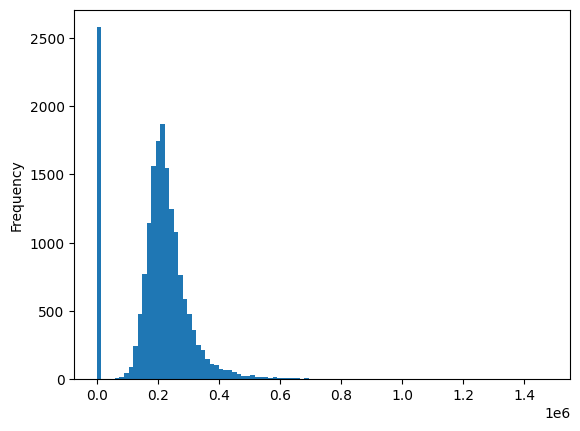

In [ ]:

datos['duration_in min/ms'].plot.hist(bins=100)

En este histogramos nos dimos cuenta que la duración de las canciones es diferente, no concuerda porque hay algunas que están en minutos y otras en milisegundos, esto no es correcto porque no tenemos todos los datos en la misma unidad. Lo arreglaríamos cambiando todos los datos de la columna que estén en minutos a milisegundos, para así tener todos los datos en una misma unidad de medida. Para diferenciar entre cuáles están en minutos y milisegundos, sólo transformaremos aquellas cuya duración sea menor que 100.

Cambiamos las canciones que estaban en minutos a milisegundos. Así manejamos todos los datos con una misma unidad.

In [ ]:
#Cambiamos las canciones que estaban en minutos a milisegundos

datos.loc[datos['duration_in min/ms']<100, 'duration_in min/ms'] = datos.loc[datos['duration_in min/ms']<100, 'duration_in min/ms']*60000

<Axes: ylabel='Frequency'>

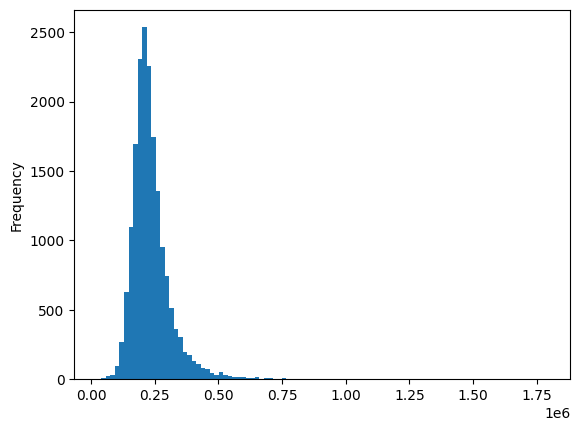

In [ ]:
datos['duration_in min/ms'].plot.hist(bins=100)

In [ ]:
IsColab = datos["Artist Name"]
IsColab

0                   Bruno Mars
1                       Boston
2                The Raincoats
3                         Deno
4        Red Hot Chili Peppers
                 ...          
17991              Green-House
17992                 Micatone
17993          Smash Hit Combo
17994                  Beherit
17995           The Raconteurs
Name: Artist Name, Length: 17996, dtype: object

Dentro de la variable IsColab asignamos 1 o 0 dependiendo de si es colaboración entre artistas o un solo.

In [ ]:
for i in range (0, len(IsColab)):
  if "feat" in IsColab[i] or "," in IsColab[i] or "&" in IsColab[i]:
    IsColab[i] = 1
  else:
    IsColab[i] = 0
# feat. , &

<ipython-input-16-4345e4bacf19>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IsColab[i] = 0
<ipython-input-16-4345e4bacf19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IsColab[i] = 1


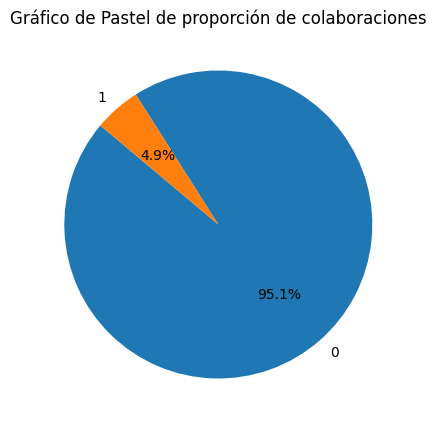

In [ ]:
# Cuenta las ocurrencias de la categoría IsColab
conteo_categorias = IsColab.value_counts()

# Crea la 'pie chart'
plt.figure(figsize=(5, 5))
plt.pie(conteo_categorias, labels=conteo_categorias.index, autopct='%1.1f%%', startangle=140)
plt.title('Gráfico de Pastel de proporción de colaboraciones')
plt.show()

Encontramos que el 4.9% son colaboraciones y el 95.1% no lo son.


##Fase 2: Exploración de los datos
###Correlación entre datos

<ipython-input-18-7978c9102a01>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(datos.corr(), annot=True, cmap='coolwarm', fmt=".2f")


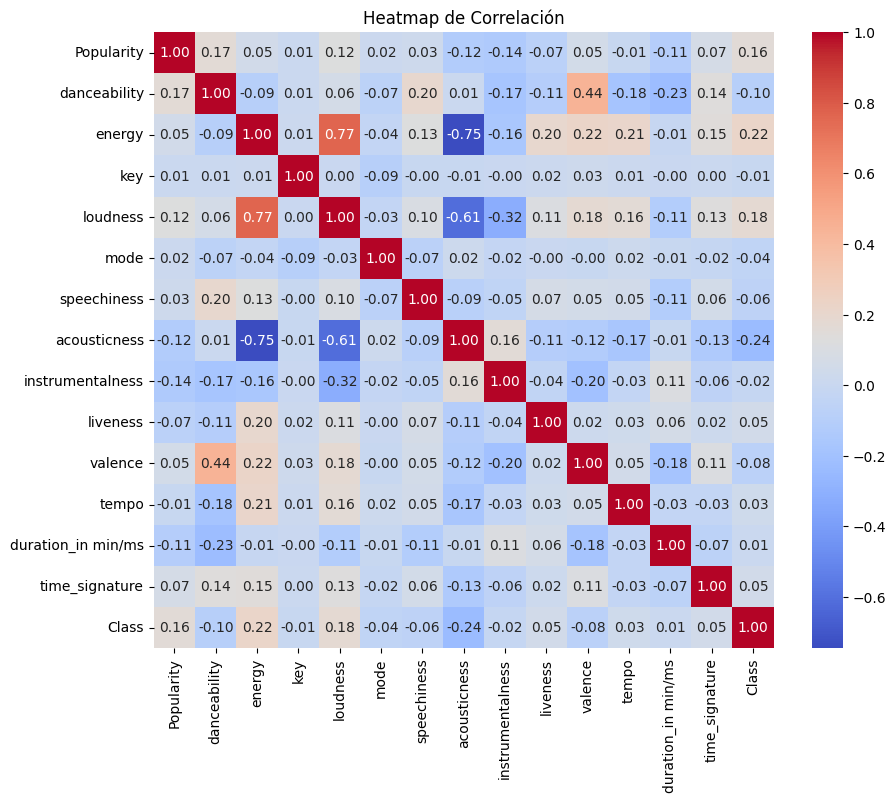

In [ ]:
plt.figure(figsize=(10, 8))  # Ajusta el tamaño del gráfico según tus preferencias
sns.heatmap(datos.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlación')
plt.show()

###Popularidad
####Popularidad contra bailabilidad

<Axes: xlabel='danceability', ylabel='Popularity'>

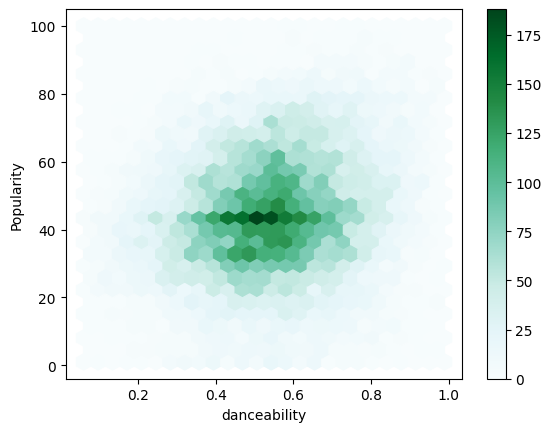

In [ ]:
datos.plot.hexbin(x="danceability", y="Popularity", gridsize=25)

####Popularidad contra género

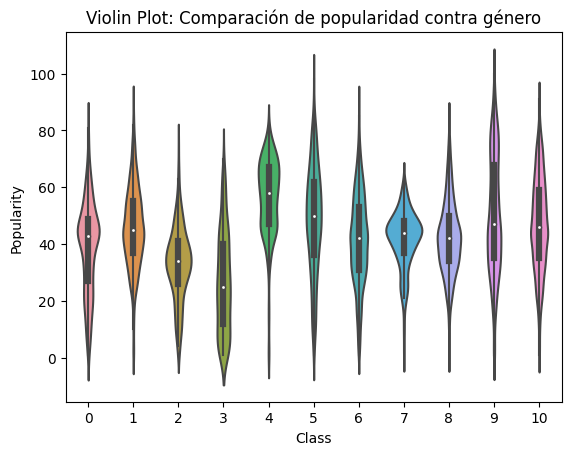

In [ ]:
sns.violinplot(x='Class', y='Popularity', data=datos)
plt.title('Violin Plot: Comparación de popularidad contra género')
plt.xlabel('Class')
plt.ylabel('Popularity')
plt.show()

####Popularidad contra "Loudness"

<Axes: xlabel='loudness', ylabel='Popularity'>

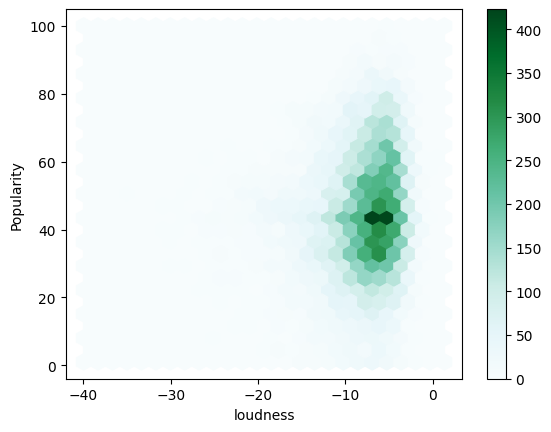

In [ ]:
datos.plot.hexbin(x="loudness", y="Popularity", gridsize=25)

###Género
####Género contra duración

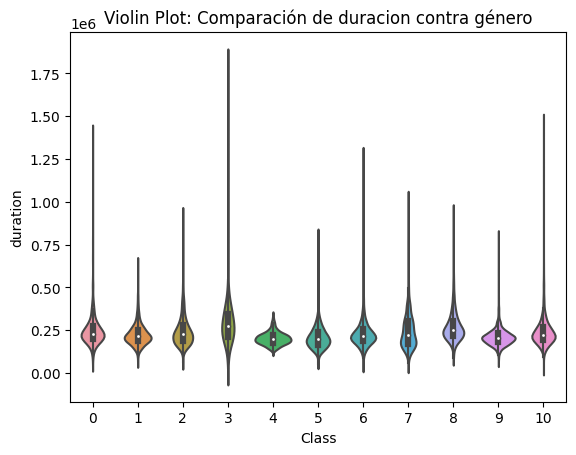

In [ ]:
sns.violinplot(x='Class', y='duration_in min/ms', data=datos)
plt.title('Violin Plot: Comparación de duracion contra género')
plt.xlabel('Class')
plt.ylabel('duration')
plt.show()

####Género contra energía

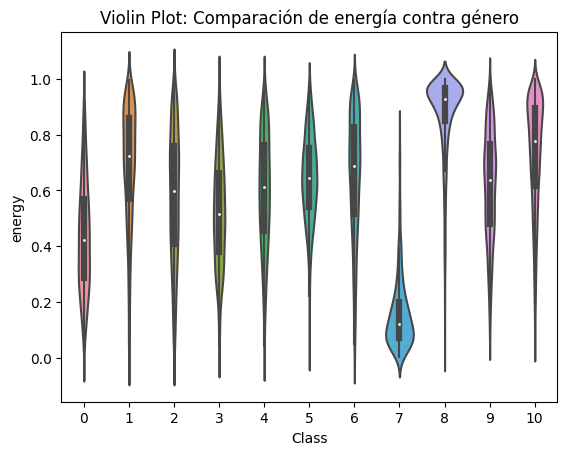

In [ ]:
sns.violinplot(x='Class', y='energy', data=datos)
plt.title('Violin Plot: Comparación de energía contra género')
plt.xlabel('Class')
plt.ylabel('energy')
plt.show()

####Género contra "Loudness"

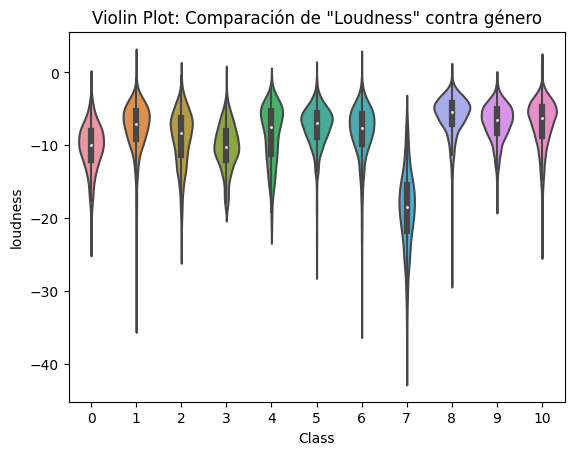

In [ ]:
sns.violinplot(x='Class', y='loudness', data=datos)
plt.title('Violin Plot: Comparación de "Loudness" contra género')
plt.xlabel('Class')
plt.ylabel('loudness')
plt.show()

# Sesgo de los datos, transformaciones de Box-Cox, test de Grubbs

Primero, exploramos las distribuciones de las variables numéricas de la base de datos para ver cuales tienen exceso de sesgo y cuales tienen valores atípicos

In [ ]:
datos.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.177562,0.0849,0.8990,134.071,234596.0,4,5
1,0,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,0,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,0,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.177562,0.1220,0.5690,107.033,173968.0,4,5
4,0,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


<Axes: title={'center': 'popularity'}, ylabel='Frequency'>

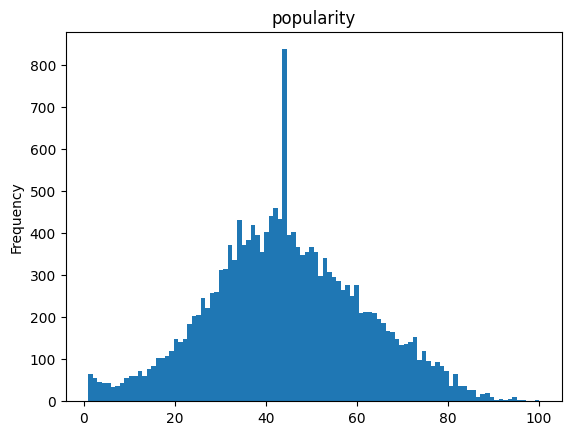

In [ ]:
datos['Popularity'].plot.hist(bins=100, title='popularity')

<Axes: title={'center': 'danceability'}, ylabel='Frequency'>

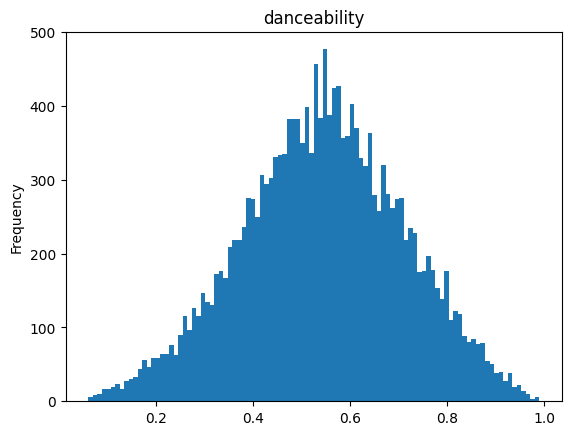

In [ ]:
datos['danceability'].plot.hist(bins=100, title='danceability')

<Axes: title={'center': 'energy'}, ylabel='Frequency'>

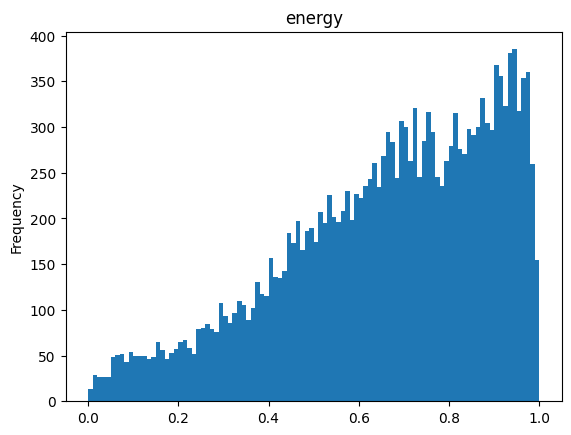

In [ ]:
datos['energy'].plot.hist(bins=100, title='energy')
#*

<Axes: title={'center': 'loudness'}, ylabel='Frequency'>

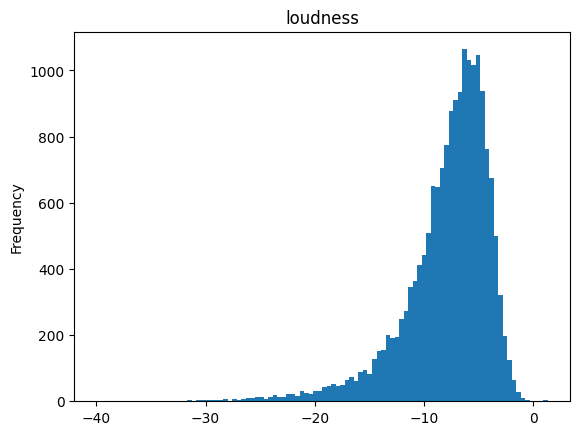

In [ ]:
datos['loudness'].plot.hist(bins=100, title='loudness')
#*

<Axes: title={'center': 'speechiness'}, ylabel='Frequency'>

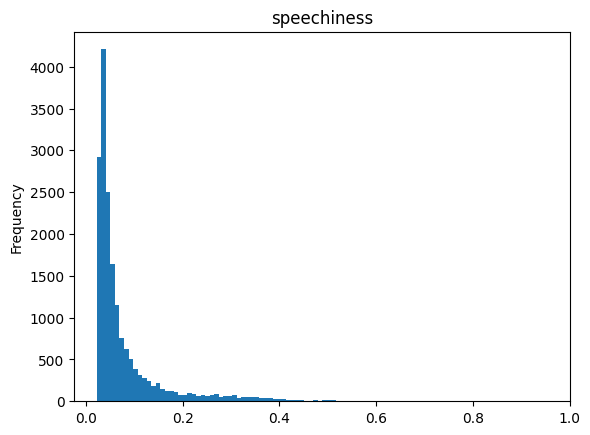

In [ ]:
datos['speechiness'].plot.hist(bins=100, title='speechiness')
#*

<Axes: title={'center': 'instrumentalness'}, ylabel='Frequency'>

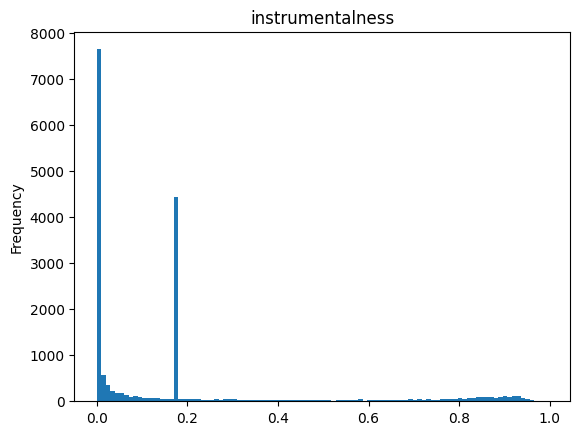

In [ ]:
datos['instrumentalness'].plot.hist(bins=100, title='instrumentalness')
#*

<Axes: title={'center': 'liveness'}, ylabel='Frequency'>

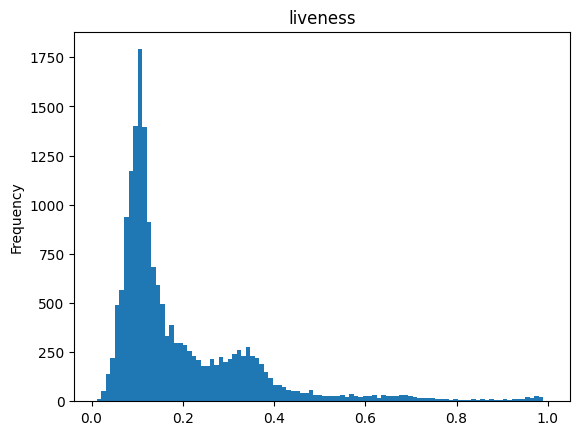

In [ ]:
datos['liveness'].plot.hist(bins=100, title='liveness')
#*

<Axes: title={'center': 'valence'}, ylabel='Frequency'>

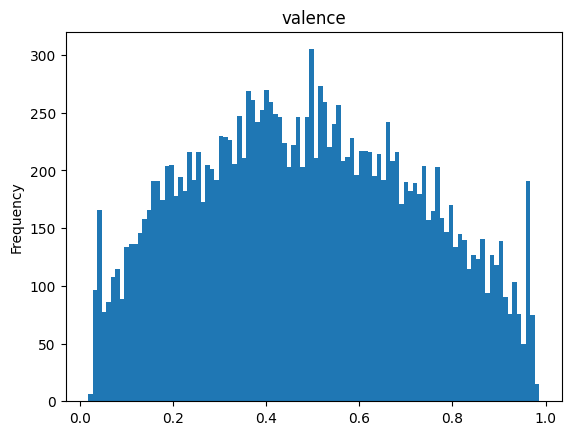

In [ ]:
datos['valence'].plot.hist(bins=100, title='valence')

<Axes: title={'center': 'duration'}, ylabel='Frequency'>

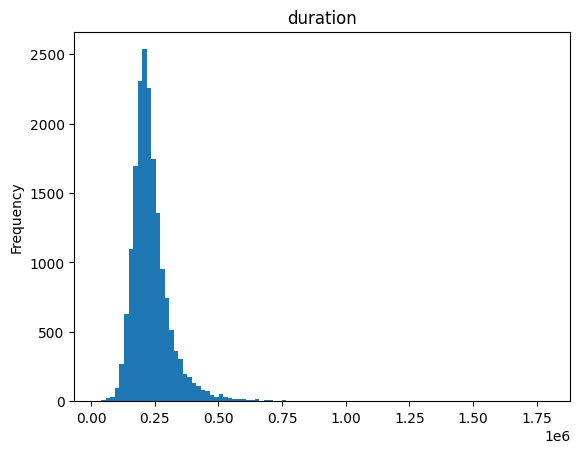

In [ ]:
datos['duration_in min/ms'].plot.hist(bins=100, title='duration')

Como podemos observar, los datos correspondientes a las siguientes variables tienen una distribución sesgada, por lo cual les aplicaremos la transformación de Box-Cox:

* energy

<Axes: ylabel='Count'>

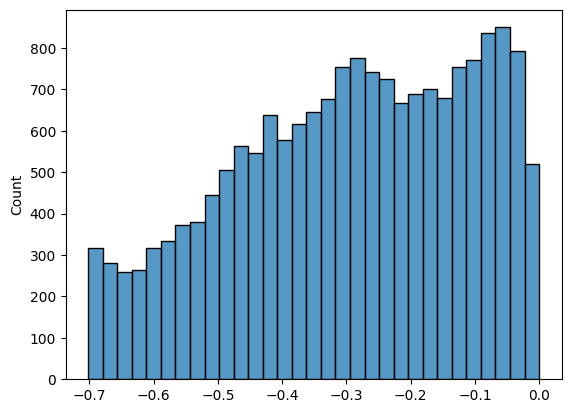

In [ ]:
e_t, _=scipy.stats.boxcox(datos['energy'])
sns.histplot(e_t)

* instrumentalness

<Axes: ylabel='Count'>

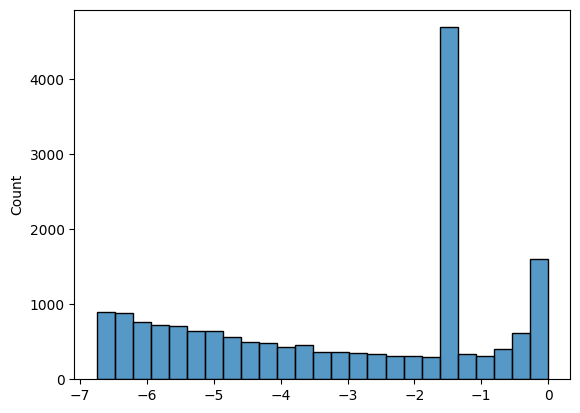

In [ ]:
i_t, _=scipy.stats.boxcox(datos['instrumentalness'])
sns.histplot(i_t)

* liveness

<Axes: ylabel='Count'>

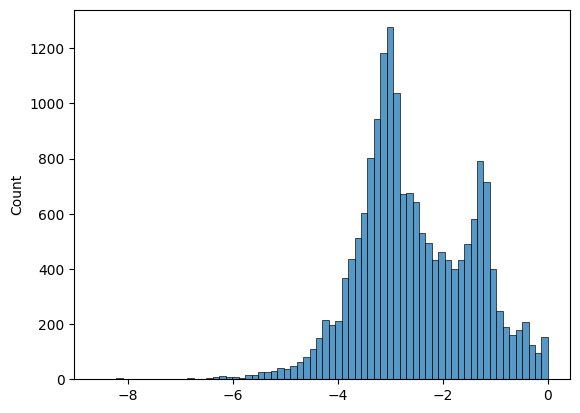

In [ ]:
l_t, _=scipy.stats.boxcox(datos['liveness'])
sns.histplot(l_t)

* duration

<Axes: ylabel='Count'>

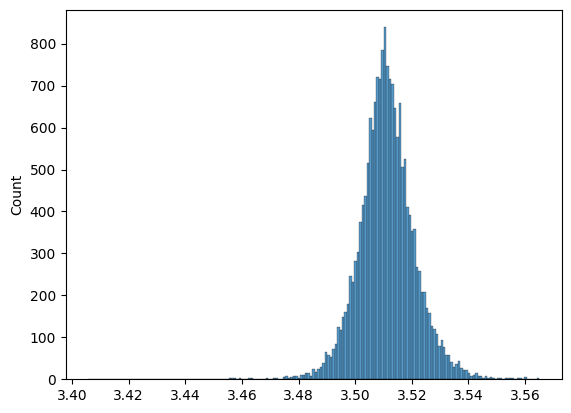

In [ ]:
d_t, _=scipy.stats.boxcox(datos['duration_in min/ms'])
sns.histplot(d_t)

## Test de grubbs

BoxPlots para identificar outliars

Outliers detected: 17568
Outlier values: [60. 54. 35. ... 34. 29. 43.]


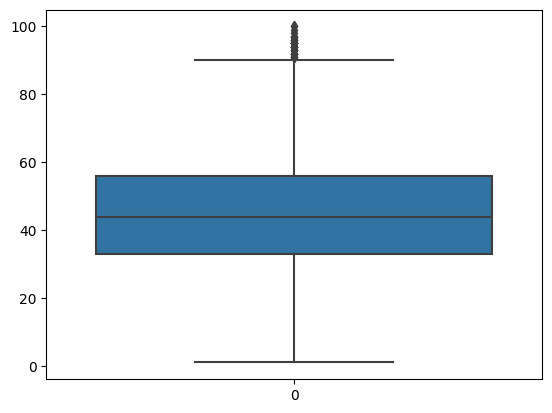

In [ ]:
sns.boxplot(data=datos['Popularity'])
data = datos['Popularity'].values

alpha = 0.05

mean = np.mean(data)
std_dev = np.std(data)

test_statistic = abs((data - mean) / std_dev)

n = len(data)
t_critical = norm.ppf(1 - alpha / (2 * n))

G = np.max(test_statistic)

outliers = test_statistic > (np.sqrt(n) / (np.sqrt(n) - 1) * np.sqrt(t_critical * 2 / (n - 2 + t_critical * 2)))

num_outliers = np.sum(outliers)

if num_outliers > 0:
    print("Outliers detected:", num_outliers)
    print("Outlier values:", data[outliers])
else:
    print("No outliers detected.")

Outliers detected: 17643
Outlier values: [0.854 0.382 0.434 ... 0.558 0.215 0.4  ]


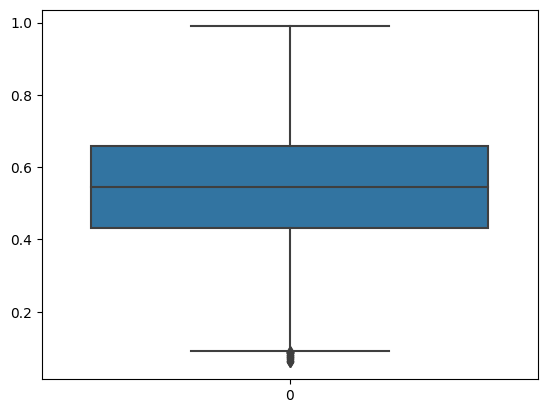

In [ ]:
sns.boxplot(data=datos['danceability'])
data = datos['danceability'].values

alpha = 0.05

mean = np.mean(data)
std_dev = np.std(data)

test_statistic = abs((data - mean) / std_dev)

n = len(data)
t_critical = norm.ppf(1 - alpha / (2 * n))

G = np.max(test_statistic)

outliers = test_statistic > (np.sqrt(n) / (np.sqrt(n) - 1) * np.sqrt(t_critical * 2 / (n - 2 + t_critical * 2)))

num_outliers = np.sum(outliers)

if num_outliers > 0:
    print("Outliers detected:", num_outliers)
    print("Outlier values:", data[outliers])
else:
    print("No outliers detected.")

Outliers detected: 17664
Outlier values: [0.564 0.814 0.614 ... 0.981 0.805 0.853]


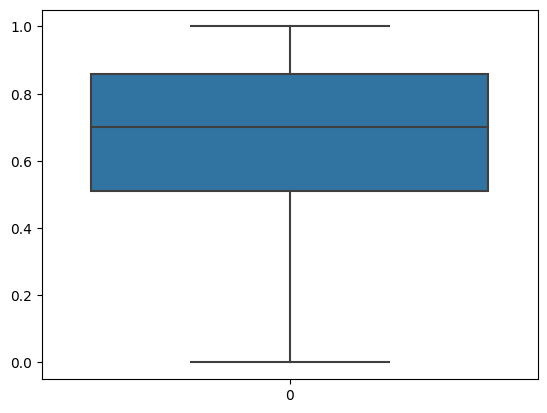

In [ ]:
sns.boxplot(data=datos['energy'])
data = datos['energy'].values

alpha = 0.05

mean = np.mean(data)
std_dev = np.std(data)

test_statistic = abs((data - mean) / std_dev)

n = len(data)
t_critical = norm.ppf(1 - alpha / (2 * n))

G = np.max(test_statistic)

outliers = test_statistic > (np.sqrt(n) / (np.sqrt(n) - 1) * np.sqrt(t_critical * 2 / (n - 2 + t_critical * 2)))

num_outliers = np.sum(outliers)

if num_outliers > 0:
    print("Outliers detected:", num_outliers)
    print("Outlier values:", data[outliers])
else:
    print("No outliers detected.")

Outliers detected: 17630
Outlier values: [ -4.964  -7.23   -8.334 ...  -4.683 -12.757  -5.32 ]


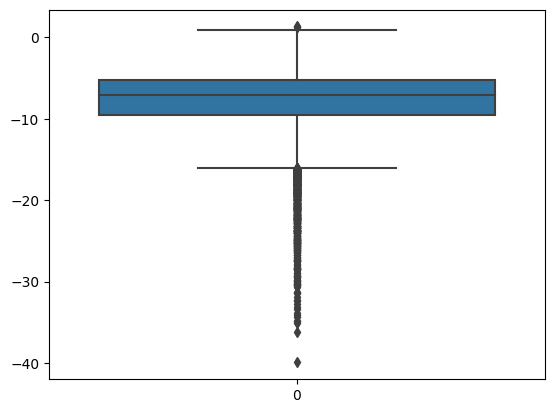

In [ ]:
sns.boxplot(data=datos['loudness'])
data = datos['loudness'].values

alpha = 0.05

mean = np.mean(data)
std_dev = np.std(data)

test_statistic = abs((data - mean) / std_dev)

n = len(data)
t_critical = norm.ppf(1 - alpha / (2 * n))

G = np.max(test_statistic)

outliers = test_statistic > (np.sqrt(n) / (np.sqrt(n) - 1) * np.sqrt(t_critical * 2 / (n - 2 + t_critical * 2)))

num_outliers = np.sum(outliers)

if num_outliers > 0:
    print("Outliers detected:", num_outliers)
    print("Outlier values:", data[outliers])
else:
    print("No outliers detected.")

Outliers detected: 17714
Outlier values: [0.0485 0.0406 0.0525 ... 0.0712 0.134  0.0591]


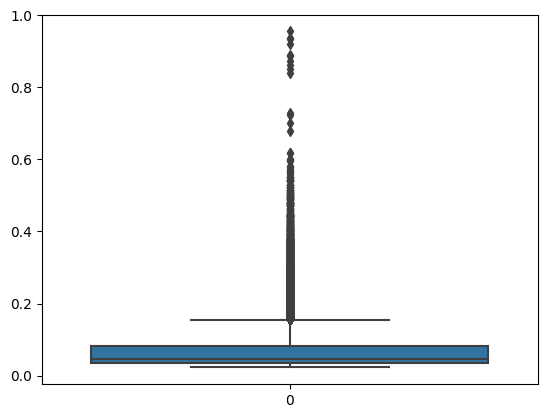

In [ ]:
sns.boxplot(data=datos['speechiness'])
data = datos['speechiness'].values

alpha = 0.05

mean = np.mean(data)
std_dev = np.std(data)

test_statistic = abs((data - mean) / std_dev)

n = len(data)
t_critical = norm.ppf(1 - alpha / (2 * n))

G = np.max(test_statistic)

outliers = test_statistic > (np.sqrt(n) / (np.sqrt(n) - 1) * np.sqrt(t_critical * 2 / (n - 2 + t_critical * 2)))

num_outliers = np.sum(outliers)

if num_outliers > 0:
    print("Outliers detected:", num_outliers)
    print("Outlier values:", data[outliers])
else:
    print("No outliers detected.")

Outliers detected: 17813
Outlier values: [1.71e-02 1.10e-03 4.86e-01 ... 2.97e-05 1.29e-03 6.04e-03]


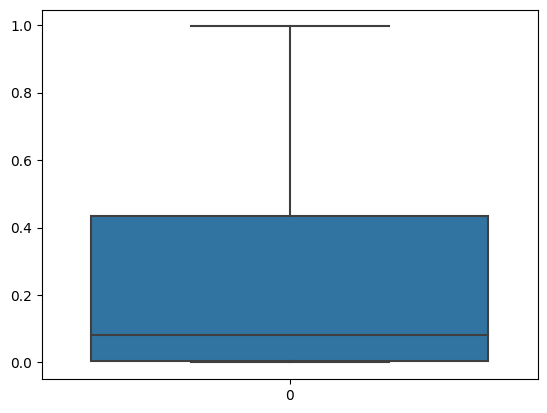

In [ ]:
sns.boxplot(data=datos['acousticness'])
data = datos['acousticness'].values

alpha = 0.05

mean = np.mean(data)
std_dev = np.std(data)

test_statistic = abs((data - mean) / std_dev)

n = len(data)
t_critical = norm.ppf(1 - alpha / (2 * n))

G = np.max(test_statistic)

outliers = test_statistic > (np.sqrt(n) / (np.sqrt(n) - 1) * np.sqrt(t_critical * 2 / (n - 2 + t_critical * 2)))

num_outliers = np.sum(outliers)

if num_outliers > 0:
    print("Outliers detected:", num_outliers)
    print("Outlier values:", data[outliers])
else:
    print("No outliers detected.")

Outliers detected: 13550
Outlier values: [4.01e-03 1.96e-04 1.61e-02 ... 1.36e-04 9.16e-01 2.12e-01]


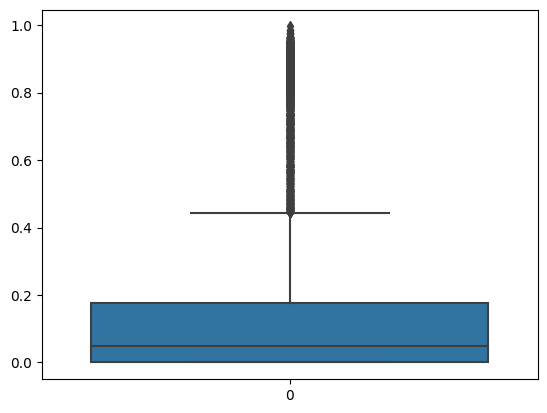

In [ ]:
sns.boxplot(data=datos['instrumentalness'])
data = datos['instrumentalness'].values

alpha = 0.05

mean = np.mean(data)
std_dev = np.std(data)

test_statistic = abs((data - mean) / std_dev)

n = len(data)
t_critical = norm.ppf(1 - alpha / (2 * n))

G = np.max(test_statistic)

outliers = test_statistic > (np.sqrt(n) / (np.sqrt(n) - 1) * np.sqrt(t_critical * 2 / (n - 2 + t_critical * 2)))

num_outliers = np.sum(outliers)

if num_outliers > 0:
    print("Outliers detected:", num_outliers)
    print("Outlier values:", data[outliers])
else:
    print("No outliers detected.")

Outliers detected: 17790
Outlier values: [0.0849 0.101  0.394  ... 0.666  0.256  0.334 ]


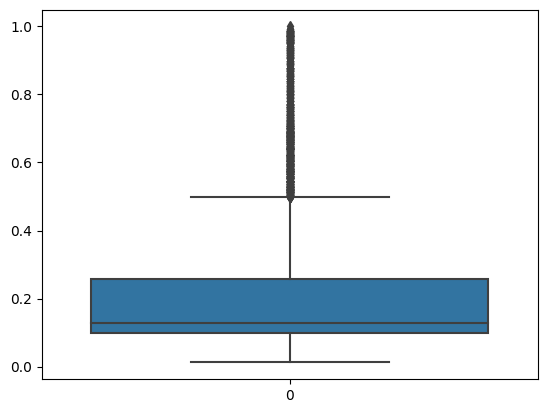

In [ ]:
sns.boxplot(data=datos['liveness'])
data = datos['liveness'].values

alpha = 0.05

mean = np.mean(data)
std_dev = np.std(data)

test_statistic = abs((data - mean) / std_dev)

n = len(data)
t_critical = norm.ppf(1 - alpha / (2 * n))

G = np.max(test_statistic)

outliers = test_statistic > (np.sqrt(n) / (np.sqrt(n) - 1) * np.sqrt(t_critical * 2 / (n - 2 + t_critical * 2)))

num_outliers = np.sum(outliers)

if num_outliers > 0:
    print("Outliers detected:", num_outliers)
    print("Outlier values:", data[outliers])
else:
    print("No outliers detected.")

Outliers detected: 17736
Outlier values: [0.899 0.569 0.787 ... 0.262 0.355 0.377]


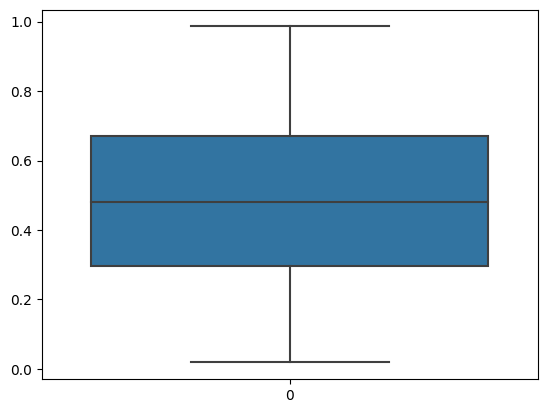

In [ ]:
sns.boxplot(data=datos['valence'])
data = datos['valence'].values

alpha = 0.05

mean = np.mean(data)
std_dev = np.std(data)

test_statistic = abs((data - mean) / std_dev)

n = len(data)
t_critical = norm.ppf(1 - alpha / (2 * n))

G = np.max(test_statistic)

outliers = test_statistic > (np.sqrt(n) / (np.sqrt(n) - 1) * np.sqrt(t_critical * 2 / (n - 2 + t_critical * 2)))

num_outliers = np.sum(outliers)

if num_outliers > 0:
    print("Outliers detected:", num_outliers)
    print("Outlier values:", data[outliers])
else:
    print("No outliers detected.")

Outliers detected: 17648
Outlier values: [134.071 116.454 147.681 ... 105.    131.363 138.102]


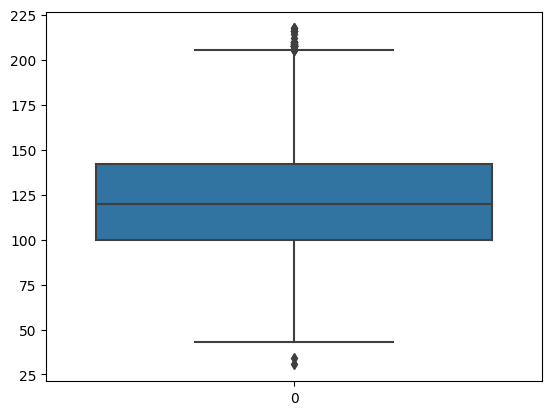

In [ ]:
sns.boxplot(data=datos['tempo'])
data = datos['tempo'].values

alpha = 0.05

mean = np.mean(data)
std_dev = np.std(data)

test_statistic = abs((data - mean) / std_dev)

n = len(data)
t_critical = norm.ppf(1 - alpha / (2 * n))

G = np.max(test_statistic)

outliers = test_statistic > (np.sqrt(n) / (np.sqrt(n) - 1) * np.sqrt(t_critical * 2 / (n - 2 + t_critical * 2)))

num_outliers = np.sum(outliers)

if num_outliers > 0:
    print("Outliers detected:", num_outliers)
    print("Outlier values:", data[outliers])
else:
    print("No outliers detected.")

Outliers detected: 17532
Outlier values: [251733. 109667. 173968. ... 216222. 219693. 182227.]


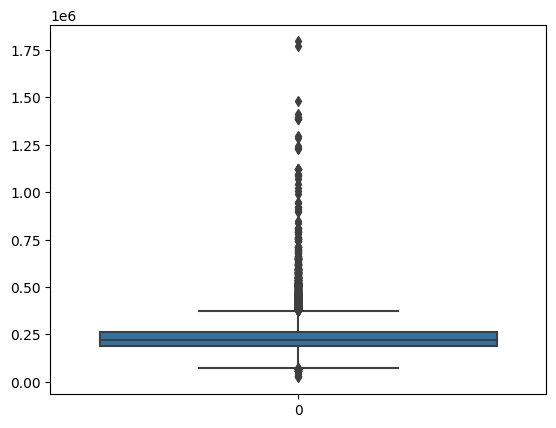

In [ ]:
sns.boxplot(data=datos['duration_in min/ms'])
data = datos['duration_in min/ms'].values

alpha = 0.05

mean = np.mean(data)
std_dev = np.std(data)

test_statistic = abs((data - mean) / std_dev)

n = len(data)
t_critical = norm.ppf(1 - alpha / (2 * n))

G = np.max(test_statistic)

outliers = test_statistic > (np.sqrt(n) / (np.sqrt(n) - 1) * np.sqrt(t_critical * 2 / (n - 2 + t_critical * 2)))

num_outliers = np.sum(outliers)

if num_outliers > 0:
    print("Outliers detected:", num_outliers)
    print("Outlier values:", data[outliers])
else:
    print("No outliers detected.")

Radar chart para las 10 canciones más populares

In [ ]:

primeros10= datos.sort_values(by = "Popularity", ascending = False).head(10)
print(primeros10)

scale = StandardScaler()
X = datos[['Popularity','danceability', 'energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_in min/ms','time_signature']]
scaledX = scale.fit_transform(X)
print(scaledX)

data1=scaledX[11781, :]
print(data1)
data2=scaledX[13489, :]
data3=scaledX[187,:]
data4=scaledX[953, :]
data5=scaledX[13869, :]
data6=scaledX[7925, :]
data7=scaledX[12714, :]
data8=scaledX[14830,:]
data9=scaledX[16394, :]
data10=scaledX[15707, :]
df = pd.DataFrame(dict(
    valor = data1,
    variable = ['Popularity','danceability', 'energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_in min/ms','time_signature']))

fig = px.line_polar(df, r = 'valor', theta = 'variable', line_close = True)

fig.show()

      Artist Name                      Track Name  Popularity  danceability  \
11781           0  MONTERO (Call Me By Your Name)       100.0         0.610   
13489           0                         Beggin'       100.0         0.714   
187             0                        good 4 u        99.0         0.563   
953             0        Kiss Me More (feat. SZA)        98.0         0.762   
13869           0                      Bad Habits        97.0         0.808   
7925            0          Astronaut In The Ocean        97.0         0.778   
12714           1       STAY (with Justin Bieber)        97.0         0.591   
14830           1       STAY (with Justin Bieber)        97.0         0.591   
16394           0                         RAPSTAR        96.0         0.789   
15707           0                         RAPSTAR        96.0         0.789   

       energy   key  loudness  mode  speechiness  acousticness  \
11781   0.508   8.0    -6.682     0       0.1520        0.2970  

In [ ]:
df = pd.DataFrame(dict(
    valor = data2,
    variable = ['Popularity','danceability', 'energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_in min/ms','time_signature']))

fig = px.line_polar(df, r = 'valor', theta = 'variable', line_close = True)

fig.show()

In [ ]:
df = pd.DataFrame(dict(
    valor = data3,
    variable = ['Popularity','danceability', 'energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_in min/ms','time_signature']))

fig = px.line_polar(df, r = 'valor', theta = 'variable', line_close = True)

fig.show()

In [ ]:
df = pd.DataFrame(dict(
    valor = data4,
    variable = ['Popularity','danceability', 'energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_in min/ms','time_signature']))

fig = px.line_polar(df, r = 'valor', theta = 'variable', line_close = True)

fig.show()

In [ ]:
df = pd.DataFrame(dict(
    valor = data5,
    variable = ['Popularity','danceability', 'energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_in min/ms','time_signature']))

fig = px.line_polar(df, r = 'valor', theta = 'variable', line_close = True)

fig.show()

In [ ]:
df = pd.DataFrame(dict(
    valor = data6,
    variable = ['Popularity','danceability', 'energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_in min/ms','time_signature']))

fig = px.line_polar(df, r = 'valor', theta = 'variable', line_close = True)

fig.show()

In [ ]:
df = pd.DataFrame(dict(
    valor = data7,
    variable = ['Popularity','danceability', 'energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_in min/ms','time_signature']))

fig = px.line_polar(df, r = 'valor', theta = 'variable', line_close = True)

fig.show()

In [ ]:
df = pd.DataFrame(dict(
    valor = data8,
    variable = ['Popularity','danceability', 'energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_in min/ms','time_signature']))

fig = px.line_polar(df, r = 'valor', theta = 'variable', line_close = True)

fig.show()

In [ ]:
df = pd.DataFrame(dict(
    valor = data9,
    variable = ['Popularity','danceability', 'energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_in min/ms','time_signature']))

fig = px.line_polar(df, r = 'valor', theta = 'variable', line_close = True)

fig.show()

In [ ]:
df = pd.DataFrame(dict(
    valor = data10,
    variable = ['Popularity','danceability', 'energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_in min/ms','time_signature']))

fig = px.line_polar(df, r = 'valor', theta = 'variable', line_close = True)

fig.show()

# Calculo y análisis de estadísticas básicas

Media aritmética, desviación estándar, varianza, rango

In [ ]:
print('Media aritmética, desviacion estándar, varianza, rango')
atributos = ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms', 'time_signature', 'Class']
#datos.head()
for i in range (len(atributos)):
  print(atributos[i], end=': '); print(round(datos[atributos[i]].mean(), 2), end=", "); print(round(datos[atributos[i]].std(), 2), end=", "); print(round(datos[atributos[i]].var(), 2), end=', '); print(datos[atributos[i]].max()-datos[atributos[i]].min());

Cuartiles

In [ ]:
print('Cuartiles (0.25, 0.5, 0.75)')
for i in range (len(atributos)):
  print(atributos[i], end=': '); print(round(datos[atributos[i]].quantile(0.25), 2), end=", "); print(round(datos[atributos[i]].quantile(0.5), 2), end=", "); print(round(datos[atributos[i]].quantile(0.75), 2));

Coeficientes de asimetría y Kurtosis

In [ ]:
print('Coeficientes de Asimetría, Kurtosis')
for i in range (len(atributos)):
  print(atributos[i], end=': '); print(round(datos[atributos[i]].skew(), 2), end=', '); print(round(datos[atributos[i]].kurtosis(),2))